In [ ]:
import random
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# df_res_sco = pd.read_csv('/content/drive/Shareddrives/FinalProj_CSCI1951Z/Copy of resume_scorer_data_final.csv')
# df_cand_eval = pd.read_csv('/content/drive/Shareddrives/FinalProj_CSCI1951Z/Copy of candidate_evaluator_final.csv')
# df_scorer_results = pd.read_csv('/content/drive/Shareddrives/FinalProj_CSCI1951Z/Copy of results_final.csv')
# df_eval_results = pd.read_csv('/content/drive/Shareddrives/FinalProj_CSCI1951Z/Copy of final_CE_results.csv')

df_res_sco = pd.read_csv('data/resume_scorer_data_final.csv')
df_cand_eval = pd.read_csv('data/candidate_evaluator_final.csv')
df_scorer_results = pd.read_csv('data/results_final.csv')
df_eval_results = pd.read_csv('data/final_CE_results.csv')

df_cand_eval['prediction'] = df_eval_results['prediction']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gender_d = df_res_sco['Gender'].value_counts()
print(gender_d)
vs_d = df_res_sco['Veteran status'].value_counts()
print(vs_d)
wa_d = df_res_sco['Work authorization'].value_counts()
print(wa_d)
disability_d = df_res_sco['Disability'].value_counts()
print(disability_d)
ethnicity_d = df_res_sco['Ethnicity'].value_counts()
print(ethnicity_d)

Gender
N/A    1018
F       993
M       989
Name: count, dtype: int64
Veteran status
N/A    1011
0      1001
1       988
Name: count, dtype: int64
Work authorization
0    1503
1    1497
Name: count, dtype: int64
Disability
N/A    1032
1      1010
0       958
Name: count, dtype: int64
Ethnicity
4    630
2    601
1    599
3    591
0    579
Name: count, dtype: int64


# True Predictions

In [ ]:
ce = df_cand_eval # Candidate Evaluator
rs = df_res_sco  # Resume Scorer

# Create a Resume Score based on GPA, Degree, and Role Experiences

resume_score = []

for i in range(len(rs)):
    score = 0
    # GPA less than 3.0 score = 1
    if rs['GPA'][i] <= 3.0:
        score= score+1
    # GPA between 3.3 and 3.5 = 1.5
    elif 3.0 < rs['GPA'][i]<=3.5:
        score= score+1.5
    # GPA greater than 3.5 = 2
    elif rs['GPA'][i] > 3.5:
        score = score+2
    # Bachelors Degree score = 1
    if rs['Degree'][i] == 'Bachelors':
        score= score+1
    # Bachelors Masters or PhD score = 1.5
    elif rs['Degree'][i] != 'Bachelors':
        score= score+1.5
    # If Bachelors Degree only need 1 role
    if rs['Degree'][i] == 'Bachelors':
        if rs['Role 1'][i] != 'N/A':
            score= score+1.5
        if rs['Role 2'][i] != 'N/A':
            score= score+2
        if rs['Role 3'][i] != 'N/A':
            score= score+2.5
    # If Masters or PhD Degree better if more
    else:
        if rs['Role 1'][i] != 'N/A':
            score= score+0.5
        if rs['Role 2'][i] != 'N/A':
            score= score+1
        if rs['Role 3'][i] != 'N/A':
            score= score+1.5
    resume_score.append(score)

ce['resume_score'] = resume_score

true_predictions = []

for i in range(len(ce)):
    if ce['resume_score'][i] >= 7:
        pred_val = 1
    else:
        pred_val = 0
    true_predictions.append(pred_val)
print(true_predictions)

ce['true_prediction'] = true_predictions

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 

Frequency of list elements : [(6.5, 645), (8.0, 573), (6.0, 180), (9.0, 293), (5.5, 1200), (8.5, 109)]


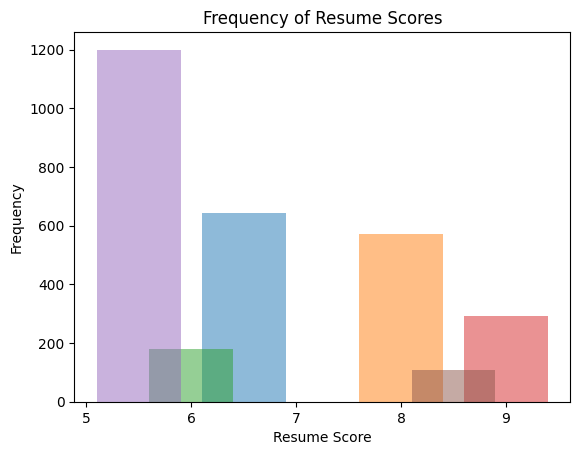

In [ ]:
# Frequency grouping of list elements
# using loop
res = []
temp = dict()
for ele in resume_score:
    if ele in temp:
        temp[ele] = temp[ele] + 1
    else:
        temp[ele] = 1
for key in temp:
    res.append((key, temp[key]))

# printing result
print("Frequency of list elements : " + str(res))

# Create bar plots
for item in res:
    plt.bar(item[0], item[1], align='center', alpha=0.5)

# Adding labels and title
plt.xlabel('Resume Score')
plt.ylabel('Frequency')
plt.title('Frequency of Resume Scores')

# Showing the plot
plt.savefig('Frequency of Resume Scores.png')
plt.show()


Frequency of list elements : [(0, 2025), (1, 975)]


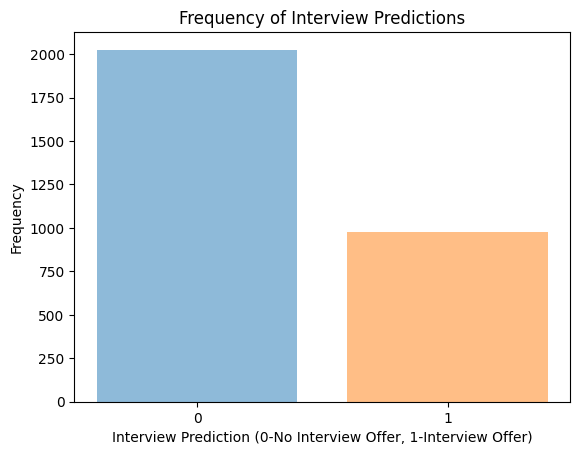

In [ ]:
# Frequency grouping of list elements
# using loop
res = []
temp = dict()
for ele in true_predictions:
    if ele in temp:
        temp[ele] = temp[ele] + 1
    else:
        temp[ele] = 1
for key in temp:
    res.append((key, temp[key]))

# printing result
print("Frequency of list elements : " + str(res))

# Create bar plots
plt.bar(res[0][0], res[0][1], alpha=0.5)
plt.bar(res[1][0], res[1][1],alpha=0.5)
# Adding labels and title
plt.xlabel('Interview Prediction (0-No Interview Offer, 1-Interview Offer)')
plt.ylabel('Frequency')
plt.title('Frequency of Interview Predictions')
plt.xticks([0, 1], [res[0][0], res[1][0]])
# Showing the plot
plt.savefig('InterviewOffer Freq.png')
plt.show()

# Sensitivity and Specificity (TPR and TNR)

In [ ]:
y_true = np.array(true_predictions)
y_pred = np.array(df_eval_results['prediction'])

In [ ]:
# Sensitivity and Specificity
tp = np.sum((y_true == 1) & (y_pred == 1))
tn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"sensitivity aka TPR:{sensitivity}")
print(f"specificity aka TNR:{specificity}")

sensitivity aka TPR:0.24307692307692308
specificity aka TNR:0.7728395061728395


# Disparate Impact

In [ ]:
# Sensitive Attributes Gender, Veteran, Work Authorization,Disability, Ethnicity

def di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_value, disp=True):
  y_true_privileged = data_true[data_true[sensitive_attribute] == majority_value][outcome_true]
  y_pred_privileged = data_pred[data_pred[sensitive_attribute] == majority_value][outcome]
  y_true_unprivileged = data_true[data_true[sensitive_attribute] != majority_value][outcome_true]
  y_pred_unprivileged = data_pred[data_pred[sensitive_attribute] != majority_value][outcome]

  tp_privileged_pred = np.sum((y_pred_privileged == 1)) / len(y_pred_privileged)
  tp_unprivileged_pred = np.sum((y_pred_unprivileged == 1)) / len(y_pred_unprivileged)

  disparate_impact = tp_unprivileged_pred / tp_privileged_pred

  return disparate_impact

In [ ]:
#Preprocess 'Gender' for DF 0 = Male, 1 = Female
ce['Gender'] = ce['Gender'].replace({'M': 0, 'F': 1})
df_cand_eval['Gender'] = df_cand_eval['Gender'].replace({'M': 0, 'F': 1})


# Distribution of sensitive attributes

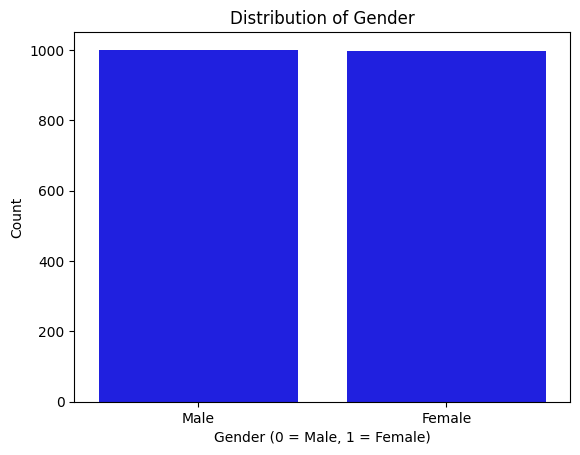

Gender
0.0    1001
1.0     997
Name: count, dtype: int64


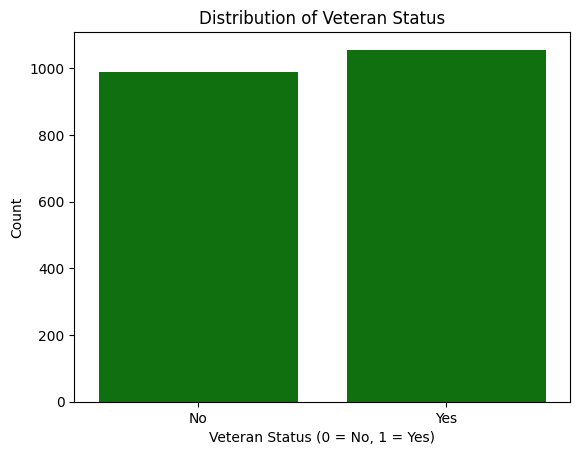

Veteran status
1.0    1056
0.0     990
Name: count, dtype: int64


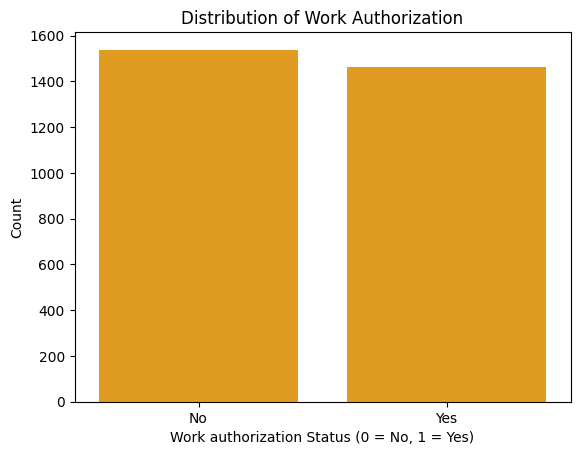

Work authorization
0    1538
1    1462
Name: count, dtype: int64


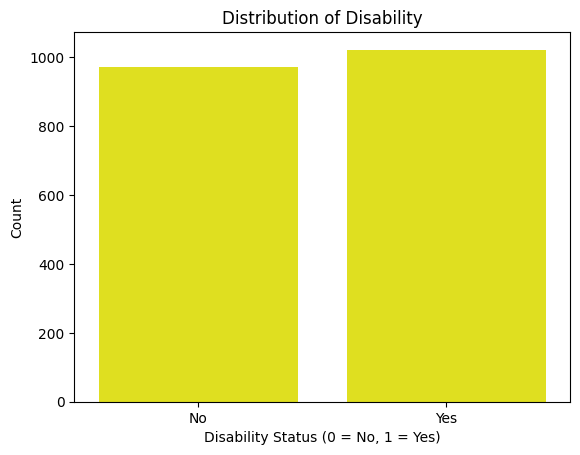

Disability
1.0    1022
0.0     971
Name: count, dtype: int64


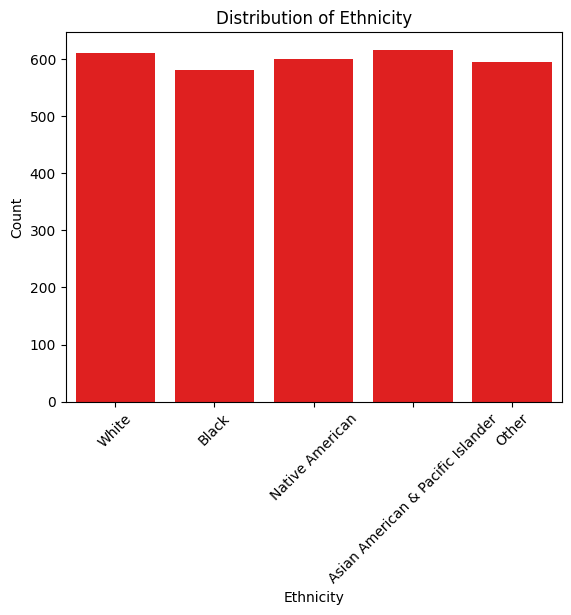

Ethnicity
3    616
0    610
2    599
4    594
1    581
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gender
sns.countplot(x='Gender', data=ce, color = 'blue')

plt.title('Distribution of Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.xticks([0,1],['Male','Female'])
plt.ylabel('Count')
plt.savefig('Gender Dist.png')
plt.show()
print(ce['Gender'].value_counts())

# Veteran
sns.countplot(x='Veteran status', data=ce, color = 'green')

plt.title('Distribution of Veteran Status')
plt.xlabel('Veteran Status (0 = No, 1 = Yes)')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Count')
plt.savefig('Veteran Dist.png')
plt.show()
print(ce['Veteran status'].value_counts())

# Work Authorization
sns.countplot(x='Work authorization', data=ce, color = 'orange')

plt.title('Distribution of Work Authorization')
plt.xlabel('Work authorization Status (0 = No, 1 = Yes)')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Count')
plt.savefig('Work Dist.png')
plt.show()
print(ce['Work authorization'].value_counts())

# Disability
sns.countplot(x='Disability', data=ce, color = 'yellow')

plt.title('Distribution of Disability')
plt.xlabel('Disability Status (0 = No, 1 = Yes)')
plt.xticks([0,1],['No','Yes'])
plt.ylabel('Count')
plt.savefig('Disability Dist.png')
plt.show()
print(ce['Disability'].value_counts())

# Ethnicity
sns.countplot(x='Ethnicity', data=ce, color = 'red')
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4],['White','Black','Native American','Asian American & Pacific Islander', 'Other'], rotation=45)

plt.savefig('Ethnicity Dist.png',bbox_inches='tight')
plt.show()
print(ce['Ethnicity'].value_counts())

In [ ]:
#Find the majority class in each sensitivie attributes
majority_gender = ce['Gender'].value_counts().idxmax()

print("Majority gender:", majority_gender)

majority_vetstat = ce['Veteran status'].value_counts().idxmax()

print("Majority Vet Status:", majority_vetstat)

majority_work= ce['Work authorization'].value_counts().idxmax()

print("Majority Work Authorization:", majority_work)

majority_disability= ce['Disability'].value_counts().idxmax()

print("Majority Disability:", majority_disability)

majority_ethnicity= ce['Ethnicity'].value_counts().idxmax()

print("Majority Ethnicity:", majority_ethnicity)

Majority gender: 0.0
Majority Vet Status: 1.0
Majority Work Authorization: 0
Majority Disability: 1.0
Majority Ethnicity: 3


In [ ]:
#Gender
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute= 'Gender'
di_gender = di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_gender,disp=True)
di_gender = round(di_gender,4)
print(f'Disparate Impact on Gender {di_gender}')

Disparate Impact on Gender 0.3147


In [ ]:
# Veteran
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Veteran status'
di_veteran = di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_vetstat,disp=True)
di_veteran = round(di_veteran, 4)
print(f'Disparate Impact Veteran Status {di_veteran}')

Disparate Impact Veteran Status 1.0679


In [ ]:
# Work Authorization
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Work authorization'
di_workauth = di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_work,disp=True)
di_workauth = round(di_workauth,4)
print(f'Disparate Impact Work Authorization {di_workauth}')

Disparate Impact Work Authorization 1.0135


In [ ]:
# Disability
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Disability'
di_disability = di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_disability,disp=True)
di_disability = round(di_disability,4)
print(f'Disparate Impact Disability {di_disability}')

Disparate Impact Disability 0.8738


In [ ]:
# Ethnicity
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Ethnicity'
di_ethnicity = di_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_ethnicity,disp=True)
di_ethnicity = round(di_ethnicity,4)
print(f'Disparate Impact Disability {di_ethnicity}')

Disparate Impact Disability 1.0467


#Equal Opportunity Differences

In [ ]:
# Sensitive Attributes Gender, Veteran, Work Authorization,Disability, Ethnicity

def eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_value, disp=True):
  y_true_privileged = data_true[data_true[sensitive_attribute] == majority_value][outcome_true]
  y_pred_privileged = data_pred[data_pred[sensitive_attribute] == majority_value][outcome]
  y_true_unprivileged = data_true[data_true[sensitive_attribute] != majority_value][outcome_true]
  y_pred_unprivileged = data_pred[data_pred[sensitive_attribute] != majority_value][outcome]

  tp_privileged = np.sum((y_true_privileged == 1) & (y_pred_privileged == 1)) / np.sum(y_true_privileged == 1)
  tp_unprivileged = np.sum((y_true_unprivileged == 1) & (y_pred_unprivileged == 1)) / np.sum(y_true_unprivileged == 1)

  eod= tp_privileged - tp_unprivileged

  return eod

In [ ]:
# Gender
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Gender'
eod_gender= eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_gender,disp=True)
eod_gender = round(eod_gender,4)
print(f'Equal Opportunity Differences Veteran Status {eod_gender}')

Equal Opportunity Differences Veteran Status 0.274


In [ ]:
# Veteran Status
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Veteran status'
eod_veteran = eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_vetstat, disp=True)
eod_vet = round(eod_veteran,4)
print(f'Equal Opportunity Differences Veteran Status {eod_vet}')

Equal Opportunity Differences Veteran Status -0.0209


In [ ]:
# Work Authorization
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Work authorization'
eod_workauth = eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_work, disp=True)
eod_work = round(eod_workauth,4)
print(f'Equal Opportunity Differences Work Authorization {eod_work}')

Equal Opportunity Differences Work Authorization -0.0298


In [ ]:
# Disability
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Disability'
eod_disability = eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_disability, disp=True)
eod_disability = round(eod_disability,4)
print(f'Equal Opportunity Differences Disability {eod_disability}')

Equal Opportunity Differences Disability 0.0162


In [ ]:
# Ethnicity
data_pred = df_cand_eval
data_true = ce
outcome = 'prediction'
outcome_true = 'true_prediction'
sensitive_attribute = 'Ethnicity'
eod_ethnicity = eod_func(data_true, data_pred, sensitive_attribute, outcome,outcome_true,majority_ethnicity, disp=True)
eod_ethnicity = round(eod_ethnicity,4)
print(f'Equal Opportunity Differences Work Authorization {eod_ethnicity}')

Equal Opportunity Differences Work Authorization -0.0633
